In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,6,np.nan,44,1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [4]:
dates = pd.date_range('20171101', periods=6)
print(dates)
# 6x4 随机数
# 右侧索引 dates
# 列ABCD
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
               '2017-11-05', '2017-11-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2017-11-01,-0.638758,0.206573,0.164176,-0.377456
2017-11-02,-1.137840,0.390217,-0.484768,0.958324
2017-11-03,-0.769646,0.412604,0.266048,0.403649
2017-11-04,0.155257,1.588251,1.889643,-0.902580
2017-11-05,1.510785,0.714626,0.758046,-0.519709
2017-11-06,1.841540,0.377593,-0.668719,0.142615


In [9]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20171101'),
    'C': pd.Series(1, index=list(range(3)), dtype='float32'),
    'D': np.array([3] *3, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test']),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2017-11-01,1.0,3,test,foo
1,1.0,2017-11-01,1.0,3,train,foo
2,1.0,2017-11-01,1.0,3,test,foo


In [10]:
df.head()

,A,B,C,D
2017-11-01,-0.638758,0.206573,0.164176,-0.377456
2017-11-02,-1.137840,0.390217,-0.484768,0.958324
2017-11-03,-0.769646,0.412604,0.266048,0.403649
2017-11-04,0.155257,1.588251,1.889643,-0.902580
2017-11-05,1.510785,0.714626,0.758046,-0.519709


In [11]:
index = pd.date_range('2/1/2018', periods=8)
print(index)

s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
print(df)

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08'],
              dtype='datetime64[ns]', freq='D')
a    0.042154
b    0.811750
c    0.591323
d    0.212165
e   -0.005779
dtype: float64
                   A         B         C
2018-02-01  1.160490  0.474647  0.339019
2018-02-02  1.799926 -0.457324  1.886303
2018-02-03  1.071525 -1.650725 -0.212031
2018-02-04 -1.001703  0.905318 -0.391312
2018-02-05 -1.284069 -1.260643 -1.418127
2018-02-06 -0.180708  0.840189  1.099740
2018-02-07  1.818946 -2.020208 -1.460217
2018-02-08 -1.917237  0.334699 -1.225186


## Head and Tail

In [12]:
long_series = pd.Series(np.arange(1000))
long_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [13]:
long_series.tail()

995    995
996    996
997    997
998    998
999    999
dtype: int64

In [24]:
df[:2]

,A,B,C
2018-02-01,0.348651,-0.165604,0.471007
2018-02-02,-0.607212,0.779911,-1.204920


In [14]:
# 把列label 转换
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2018-02-01,1.160490,0.474647,0.339019
2018-02-02,1.799926,-0.457324,1.886303
2018-02-03,1.071525,-1.650725,-0.212031
2018-02-04,-1.001703,0.905318,-0.391312
2018-02-05,-1.284069,-1.260643,-1.418127
2018-02-06,-0.180708,0.840189,1.099740
2018-02-07,1.818946,-2.020208,-1.460217
2018-02-08,-1.917237,0.334699,-1.225186


In [15]:
#翻转数据, transpose:
df.T

,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-03 00:00:00,2018-02-04 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00
a,1.160490,1.799926,1.071525,-1.001703,-1.284069,-0.180708,1.818946,-1.917237
b,0.474647,-0.457324,-1.650725,0.905318,-1.260643,0.840189,-2.020208,0.334699
c,0.339019,1.886303,-0.212031,-0.391312,-1.418127,1.099740,-1.460217,-1.225186


In [17]:
# sort
print(df2)
df2.sort_index(axis=1, ascending=False)

     A          B    C  D      E    F
0  1.0 2017-11-01  1.0  3   test  foo
1  1.0 2017-11-01  1.0  3  train  foo
2  1.0 2017-11-01  1.0  3   test  foo


,F,E,D,C,B,A
0,foo,test,3,1.0,2017-11-01,1.0
1,foo,train,3,1.0,2017-11-01,1.0
2,foo,test,3,1.0,2017-11-01,1.0


In [18]:
df2.sort_values(by='E')

,A,B,C,D,E,F
0,1.0,2017-11-01,1.0,3,test,foo
2,1.0,2017-11-01,1.0,3,test,foo
1,1.0,2017-11-01,1.0,3,train,foo


##### 筛选数据

In [21]:
df2.E

0     test
1    train
2     test
Name: E, dtype: category
Categories (2, object): [test, train]

In [27]:
# 跨越多行或多列:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [30]:
print(df['A'], df.B)

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64 2013-01-01     1
2013-01-02     5
2013-01-03     9
2013-01-04    13
2013-01-05    17
2013-01-06    21
Freq: D, Name: B, dtype: int64


In [32]:
# 多行
print(df[1:3])

            A  B   C   D
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [34]:
print(df['2013-01-02':'2013-01-03'])

            A  B   C   D
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [35]:
df.loc['2013-01-03']

A     8
B     9
C    10
D    11
Name: 2013-01-03 00:00:00, dtype: int64

In [36]:
# 选取第x行第A列
df.loc['2013-01-03', ['A']]

A    8
Name: 2013-01-03 00:00:00, dtype: int64

In [37]:
df.loc[:, ['A']]

,A
2013-01-01,0
2013-01-02,4
2013-01-03,8
2013-01-04,12
2013-01-05,16
2013-01-06,20


In [41]:
# 根据下标选择 
print(df)
print('\n(3,1):', df.iloc[3, 1])

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23

(3,1): 13


In [42]:
# 
df.iloc[3:5, 1:3]

,B,C
2013-01-04,13,14
2013-01-05,17,18


In [43]:
print(df.ix[:3,['A','C']])

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


/Users/apple/.virtualenvs/math3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [44]:
print(df[df.A>8])

             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [46]:
# 创建数据 6x4

dates = pd.date_range('20130101', periods=6) 
df = pd.DataFrame(np.arange(24).reshape(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [50]:
# 我们可以利用索引或者标签确定需要修改值的位置
df.iloc[2, 2] = 500 
df.loc['2013-01-06', 'B'] = 500
print(df)

             A    B    C   D
2013-01-01   0    1    2   3
2013-01-02   4    5    6   7
2013-01-03   8    9  500  11
2013-01-04  12   13   14  15
2013-01-05  16   17   18  19
2013-01-06  20  500   22  23


In [51]:
# 根据条件设置
# 如果现在的判断条件是这样, 我们想要更改B中的数, 
# 而更改的位置是取决于 A 的. 
# 对于A大于4的位置. 更改B在相应位置上的数为0.
df.B[df.A>4] = 0
print(df.B)

2013-01-01    1
2013-01-02    5
2013-01-03    0
2013-01-04    0
2013-01-05    0
2013-01-06    0
Freq: D, Name: B, dtype: int64


In [60]:
# 按行或列设置
# 如果对整列做批处理, 加上一列 ‘F’, 并将 F 列全改为 NaN, 如下:
df['F'] = np.nan
print(df)

             A  B    C   D   F  E
2013-01-01   0  1    2   3 NaN  1
2013-01-02   4  5    6   7 NaN  2
2013-01-03   8  0  500  11 NaN  3
2013-01-04  12  0   14  15 NaN  4
2013-01-05  16  0   18  19 NaN  5
2013-01-06  20  0   22  23 NaN  6


In [61]:
# 添加数据
# 用上面的方法也可以加上 Series 序列（但是长度必须对齐）。
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101', periods=6))
print(df)

             A  B    C   D   F  E
2013-01-01   0  1    2   3 NaN  1
2013-01-02   4  5    6   7 NaN  2
2013-01-03   8  0  500  11 NaN  3
2013-01-04  12  0   14  15 NaN  4
2013-01-05  16  0   18  19 NaN  5
2013-01-06  20  0   22  23 NaN  6


In [64]:
# 删除NaN的行或列
df.dropna(
    axis=1,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 
print(df)

             A  B    C   D   F  E
2013-01-01   0  1    2   3 NaN  1
2013-01-02   4  5    6   7 NaN  2
2013-01-03   8  0  500  11 NaN  3
2013-01-04  12  0   14  15 NaN  4
2013-01-05  16  0   18  19 NaN  5
2013-01-06  20  0   22  23 NaN  6


In [58]:
df

,A,B,C,D,F,E
2013-01-01,0,1,2,3,NaN,1
2013-01-02,4,5,6,7,NaN,2
2013-01-03,8,0,500,11,NaN,3
2013-01-04,12,0,14,15,NaN,4
2013-01-05,16,0,18,19,NaN,5
2013-01-06,20,0,22,23,NaN,6


In [59]:
df.fillna(value=0)
print(df)

             A  B    C   D   F  E
2013-01-01   0  1    2   3 NaN  1
2013-01-02   4  5    6   7 NaN  2
2013-01-03   8  0  500  11 NaN  3
2013-01-04  12  0   14  15 NaN  4
2013-01-05  16  0   18  19 NaN  5
2013-01-06  20  0   22  23 NaN  6


In [66]:
df.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,True,False
2013-01-03,False,False,False,False,True,False
2013-01-04,False,False,False,False,True,False
2013-01-05,False,False,False,False,True,False
2013-01-06,False,False,False,False,True,False


In [67]:
np.any(df.isnull()) == True  

True

In [104]:
# 读取csv， 做简单分析
game_data = pd.read_csv('top1000game.csv')
game_data.head()
# game_data.describe()
# game_data.to_pickle('top1000game.pickle')
game_data.sort_values('Count', ascending=False)

# game_data = game_data.cumsum()
# game_data.plot()

,游戏,apk_type,Count
0,com.mobile.legends,2,78
1,com.ngame.allstar.eu,2,75
2,com.firsttouchgames.dls3,2,56
3,com.bandainamcoent.ninjavoltage_app,2,49
4,com.nekki.shadowfight3,2,46
5,com.netease.chiji,2,45
6,com.LOUTF.HomeGaurds,2,42
7,com.kiloo.subwaysurf,2,35
8,com.supercell.clashofclans,2,33
9,com.nexon.elswordlunasl,2,30


#### 数据合并

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


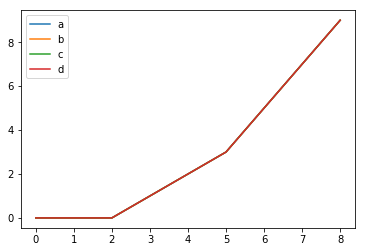

In [105]:
# axis (合并方向)
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)

# concat 纵向合并
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)
res = res.cumsum()
res.plot()

In [87]:
# join (合并方式)
# join='outer'为预设值，因此未设定任何参数时，函数默认join='outer'。
# 此方式是依照column来做纵向合并，有相同的column上下合并在一起，
# 其他独自的column个自成列，原本没有值的位置皆以NaN填充。
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)
print(df2)
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [88]:
res.fillna(value=0)

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0


In [89]:
### inner
# 原理同上个例子的说明，但只有相同的column合并在一起，其他的会被抛弃
res = pd.concat([df1, df2], axis=0, join='inner')
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


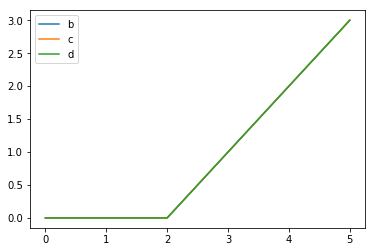

In [102]:
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)
res = res.cumsum()
res.plot()

In [107]:
# join_axes (依照 axes 合并)
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [108]:
#依照`df1.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [109]:
##移除join_axes，并打印结果
res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [113]:
# append只有纵向合并，没有横向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [114]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


##### 画图

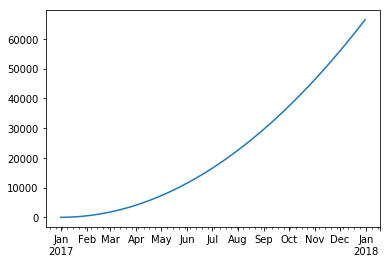

In [93]:
ts = pd.Series(np.arange(365), index=pd.date_range('1/1/2017', periods=365))
ts = ts.cumsum()
ts.plot()

##### merge

In [116]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [117]:
#依据key1与key2 columns进行合并，
# 并打印出四种结果['left', 'right', 'outer', 'inner']

res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)


    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2


In [ ]:
df = pd.DataFrame()

In [100]:
data = np.random.randn(1000, 4)
print(data.shape)

(1000, 4)


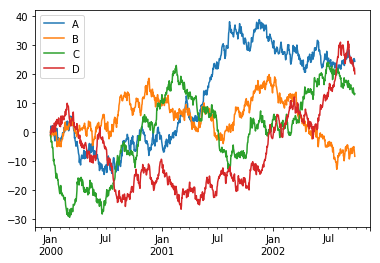

In [101]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')